# Integrantes
- Aguilar Martínez Erick Yair
- Martínez Muñoz Alan Magno
- Mendoza Hernández Carlos Emiliano

In [ ]:
cpi_data <- read.csv("CPIAUCSL.csv")
cpi_ts <- ts(cpi_data$CPIAUCSL, start = c(1947, 1), frequency = 12)

In [ ]:
# Moving average
media_movil <- function(serie, n) {
  mov_avg <- numeric(length(serie))
  for (i in seq_along(serie)) {
    if (i < n) {
      mov_avg[i] <- NA
    } else {
      mov_avg[i] <- mean(serie[(i - n + 1):i])
    }
  }
  return(mov_avg)
}

In [ ]:
# Simple Exponential Smoothing
suavizado_exponencial <- function(serie, alpha) {
  suavizado <- numeric(length(serie))
  suavizado[1] <- serie[1]
  for (i in 2:length(serie)) {
    suavizado[i] <- alpha * serie[i] + (1 - alpha) * suavizado[i - 1]
  }
  return(suavizado)
}

In [ ]:
# Usar nuestra función para una media móvil
media_movil_a_mano <- media_movil(cpi_ts, 12)

In [ ]:
if (!require(forecast)) install.packages("forecast")
library(forecast)

# Usar la media móvil de la biblioteca forecast
media_movil <- ma(cpi_ts, order = 12)

In [ ]:
# Usar nuestra función para la exponencial simple
suavizado_exponencial_a_mano <- suavizado_exponencial(cpi_ts, 0.2)

In [ ]:
# Usar la función `ses` de la biblioteca forecast para el suavizado exponencial
suavizado_exponencial <- ses(cpi_ts, alpha = 0.2)$fitted

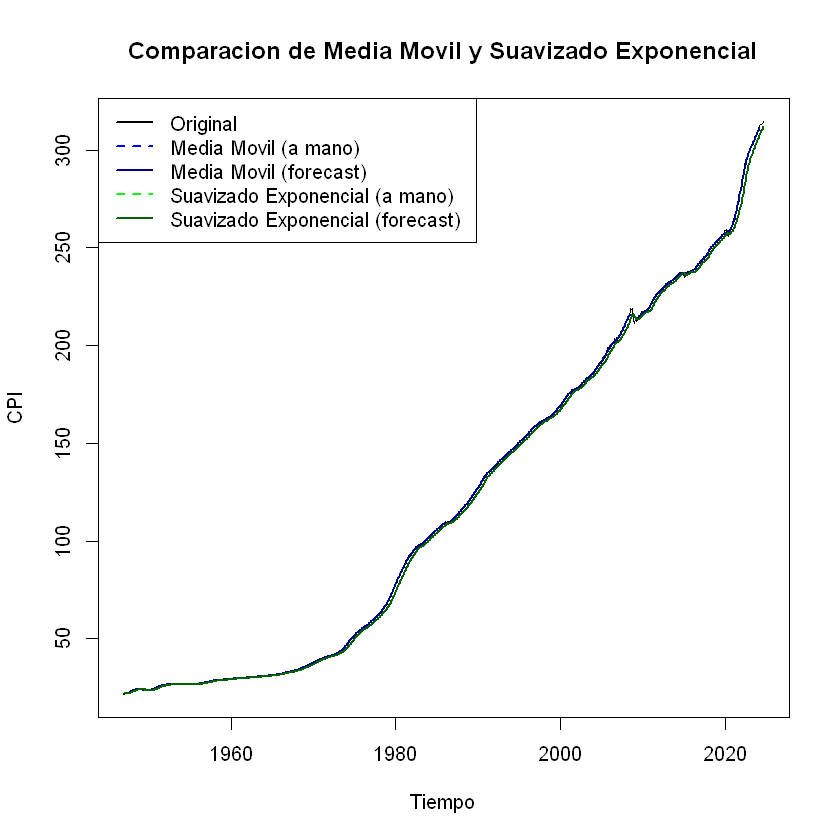

In [24]:
par(bg = "white")
plot(cpi_ts, main = "Comparacion de Media Movil y Suavizado Exponencial",
     col = "black", ylab = "CPI", xlab = "Tiempo", lwd = 1.5)

lines(media_movil_a_mano, col = "blue", lwd = 2, lty = 2) #Media Móvil a mano
lines(media_movil, col = "darkblue", lwd = 2, lty = 1) #Media Móvil con forecast

#Suavizado Exponencial a mano
lines(suavizado_exponencial_a_mano, col = "green", lwd = 2, lty = 2)
#Suavizado Exponencial con forecast
lines(suavizado_exponencial, col = "darkgreen", lwd = 2, lty = 1)

legend("topleft", legend = c("Original", "Media Movil (a mano)", "Media Movil (forecast)", 
                             "Suavizado Exponencial (a mano)", "Suavizado Exponencial (forecast)"),
       col = c("black", "blue", "darkblue", "green", "darkgreen"), lty = c(1, 2, 1, 2, 1), lwd = 2)